# Case Study: How Does a Bike-Share Navigate Speedy Success?

## Scenario 

I am assigned as a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## Background:
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. My manager, Lily Moreno, believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.

### Stakeholders:

Primary stakeholder: 
Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

### Secondary stakeholder:

Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels 

Cyclistic marketing analytics team: I joined this team of data analysts six months ago. We are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy and help Cyclistic achieve them.

## Objective:

Final goal for the marketing analytics team: Design marketing strategies aimed at converting casual riders into annual members.

Business task assigned to me: Figure out how annual members and casual riders use Cyclistic bikes differently. 

In doing so, I hope to help stakeholders better understands:
  - How annual members and casual riders differ.
  - Why casual riders would buy a membership.
  - How digital media could affect their marketing tactics.
  - If there are sufficient data to answer those questions. 
  
 To achieve that, I have defined four matrices to evaluate the differences between annual members and causal rider's rental pattern:
- Frequency of rental
- Average duration of rentals 
- Locations with the most rentals
- Most popular bike types 

## Data Preparation:

I will be using Cyclistic’s past 12 month's (September 2020 - August 2021) trip data to analyze and identify trends (Note: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate and will enable you to answer the business questions. The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement)

The data are collected internally using Cyclistic's own system. Then, the data are uploaded to a secured server for users to download. The data was downloaded and stored on my secured hard rive to insure privacy and security. 

We can safely assume that the data is non bias, reliable, original, current, and cited as it is collected internally by Cyclistic. It is also comprehensive, since the data are formatted in .csv files. 


## Data Processing:

The data are duplicated, and the raw data set is stored in a separate folder. The duplicated set is then reviewed in Microsoft Excel:
1)	Reviewed the spreadsheets to get a good idea on what I have to work with. 
2)	Sorting and filtering: Removing numbers that are too big, too small, or values that does not belong in a column. Then, reveal “null”, or NA values in the columns using filters. By removing those rows, it would allow for smoother cleaning later.
3)	Performed the duplicate removal function on all data sets. Afterward, I added three new columns:

  - ride_length: showing the duration of each rental "=TEXT(D2-C2,"HH:MM:SS")"
  - day_of_week: showing rental per day of the week  "=WEEKDAY(C2,1)" 
  - day_of_week_w: since =WEEKDAY() returns a number, I use this column to translate the number into a word "=IF(O2=1, "Sunday",IF(O2=2, "Monday",IF(O2=3, "Tuesday",IF(O2=4, "Wednesday", IF(O2=5, "Thursday", IF(O2=6, "Friday", IF(O2=7, "Saturday", "Null")))))))"

I will be importing data into RStudio for the remaining portion of data cleaning. I will also employ different data analysis packages offered by the R community, such as tidyverse, janitor, and lubridate, to allow for more efficient and effective 
cleaning. 

tidyverse is used for data analysis and obtaining quick visualization to gain insight easier
janitor is used for cleaning rows and columns of empty values 
lubridate is used for easy date/time application 




In [ ]:
```{r}
install.packages("tidyverse")
install.packages("janitor")
install.packages("lubridate")
library(tidyverse)
library(janitor)
library(lubridate)
```

Then, I inputted the 12 data sets from my hard drive into R. 


In [ ]:
```{r}
df1 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202009_TD.csv")
df2 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202010_TD.csv")
df3 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202011_TD.csv")
df4 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202012_TD.csv")
df5 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202101_TD.csv")
df6 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202102_TD.csv")
df7 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202103_TD.csv")
df8 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202104_TD.csv")
df9 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202105_TD.csv")
df10 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202106_TD.csv")
df11 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202107_TD.csv")
df12 <- read.csv("C:/Users/User/Downloads/Data Analytics/Case Study 1/Clean Data/202108_TD.csv")
```

Methods used to begin the analysis:
- Consolidate the data sets into one so it is easier to work with
- Clean the data set using janitor to make sure there are no blank values
- Ensure columns are in correct data formats
- Keep only the columns I need for my analysis

With those in mind, I proceeded with the cleaning


In [ ]:
```{r}
bike_rides <- rbind(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12) 
bike_rides <- janitor::remove_empty(bike_rides, which = c("cols"))
bike_rides <- janitor::remove_empty(bike_rides, which = c("rows"))
```

Next, I used a few summary functions to see if the data are ready to be used. 

In [1]:
```{r}
str(bike_rides)
summary(bike_rides)

```

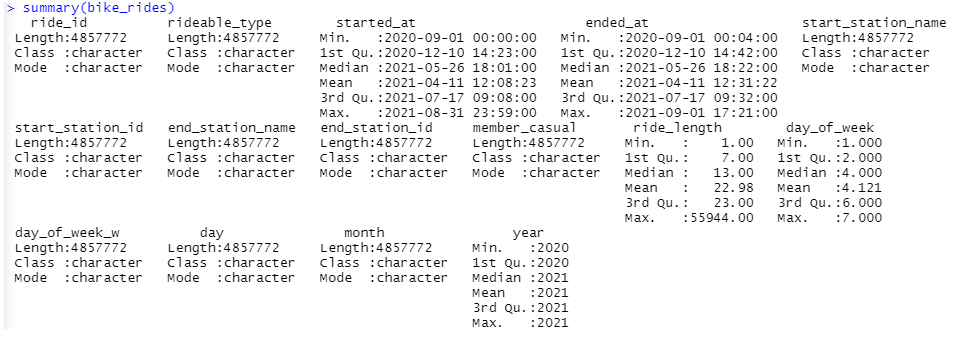


All the column names are here, but I noticed in the summary() command that the started_by and ended_by columns are characters, instead of dttm format. So I tried the following code to try to convert it:

In [ ]:
```{r}
cols(
  ride_id = col_character(),
  rideable_type = col_character (),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id=col_double(),
  end_station_name=col_character(),
  end_station_id=col_double(),
  start_lat=col_double(),
  start_lng=col_double(),
  end_lat=col_double(),
  end_lng=col_double(),
  member_casual=col_character()
)
as_tibble(bike_rides)
```

Double checked it again, and the data type is still incorrect. So I tried another approach:


In [ ]:
```{r}
bike_rides$started_at <- as.POSIXct(bike_rides$started_at, format="%m/%d/%Y %H: %M")
bike_rides$ended_at <- as.POSIXct(bike_rides$ended_at, format="%m/%d/%Y %H: %M")
```

This worked! 

Now, I can perform the difftime() function to get the ride duration of each rental. I also used the as.numberic() function to ensure we can perform statistical calculation on the column later. 

In [ ]:
```{r}
bike_rides$ride_length <- difftime(bike_rides$ended_at, bike_rides$started_at, units="mins")
bike_rides$ride_length <- as.numeric(bike_rides$ride_length)
```

Now that we have ride_length in place, I want to expand the analysis beyond only the day of the week. Keeping in mind that our primary stakeholders are detail-oriented, I will break down the data into days and month. Since we are focusing on the pass 12 months of data, the calender year might not be as important. However, in case the stakeholders ask, I can add in another line of code for creating a year column. 

In [ ]:
```{r}
bike_rides$day <- weekdays(bike_rides$started_at)
bike_rides$month <- months(bike_rides$started_at)
bike_rides$year <- year(bike_rides$started_at)
```

Once those columns are created, I stopped and reviewed what I have.


In [ ]:
```{r}
View(bike_rides)
```


Upon checking, I noticed from the filter function that the values range from -2000 to 56000. This could be due to technical difficulties, such as stations not capturing the returns correctly. Or the company took in bikes from different stations for repairing, and deployed them to the wrong station after. This would be a question to bring up during the next team meeting. For now, those negative values cleaned out.


In [ ]:
```{r}
bike_rides <- filter(bike_rides, bike_rides$ride_length > 0)
```

I have also noticed that the start_lat, start_lng, end_lat, and end_lng are not necessary because one station could have multiple latitude and longitude. To double check if that is the case before I remove the columns, I used:


In [ ]:
```{r}
name_lat_lng <- bike_rides %>%
  select(start_station_name, start_lat, start_lng)
View(name_lat_lng) 
```

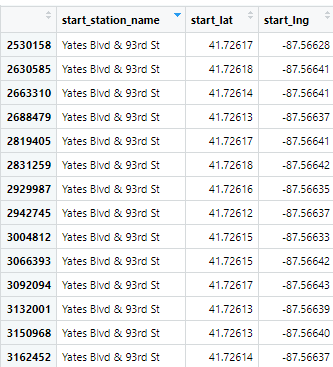

After confirming that is the case, I removed the columns. Afterward, a quick check with the str() function. 


In [ ]:
```{r}
bike_rides <- bike_rides %>%
  select(-c(start_lat, start_lng, end_lat, end_lng))
str(bike_rides)
```

Excellent, the four columns are removed

So far, the data looks to be ready for further analysis. We can obtain a few important stats by using aggregate():


In [ ]:
```{r}
mean_member_casual <- aggregate(ride_length~member_casual, bike_rides, mean)
max_member_casual <- aggregate(ride_length~member_casual, bike_rides, max)
min_member_casual <- aggregate(ride_length~member_casual, bike_rides, min)
mean_member_casual
max_member_casual
min_member_casual
```

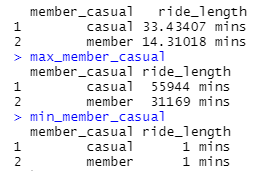

Obviously, that will not satisfy our need. Those stats will at most give us a high level review of the data.

## Visualization 

We could use the ggplot() function in R to create data viz by using ggplot(). However, due to the large amount of comparison in different matrices. I will mainly be using Tableau Public to create data viz since it is easier and more efficient to use.


In [ ]:
```{r}
ggplot(data=bike_rides)+
  geom_bar(mapping=aes(x=day_of_week_w, fill=member_casual))+
  labs(
    title="Number of Rental per Day of the Week",
    x="Day of the Week",
    y="Number of Rentals",
    )
```

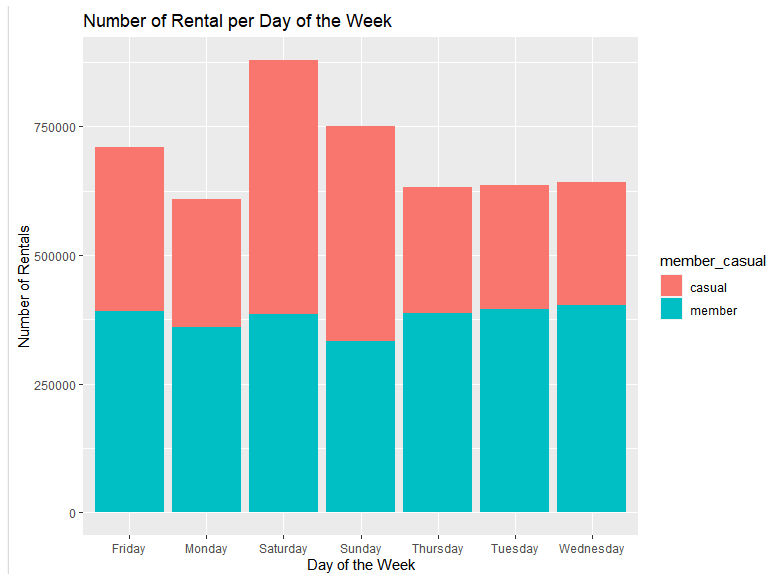

 I will export the cleaned data set so we can upload it to Tableau Public.

In [ ]:
```{r}
write.csv(bike_rides, "cleaned_case_1_data.csv")
```

### Using [Tableau Public](https://public.tableau.com/)


By using Tableau, a public data visualization tool, I am able to create data viz with dragging and dropping different fields. This greatly improved efficiency. 

Let us recall the four matrices we will be evaluating the differences of member and causal riders with:
- Frequency of rental
- Average duration of rentals 
- Locations with the most rentals
- Most popular bike types 


#### Frequency 
The first difference we can observe is that casual riders have significantly more rental during Saturday and Sunday. Member riders have a more consistent level of bike usage throughout the week, with the lowest use on Sundays. 

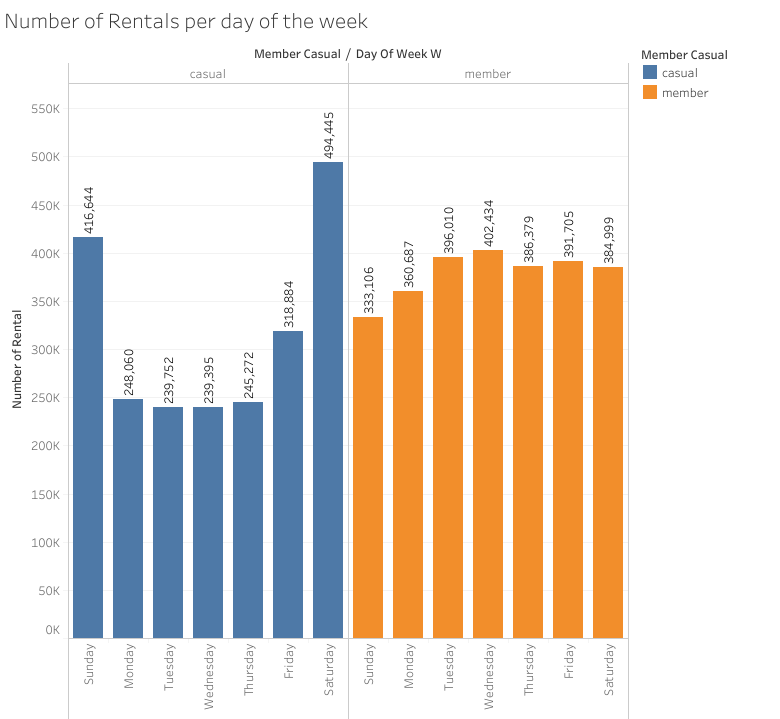

#### Location

Then, we can see that the most favorited biking location (both starting and ending) for casual riders is the Streeter Dr & Grand Ave station. The most popular location (both starting and ending) for members is the Kingsbury St & Kinzie St. For those who are not familiar with the city of Chicago, Kingsbury St & Kinzie St is near downtown, and is populated by offices and buildings. Whereas Streeter Dr & Grand Ave station is near a  waterfront park and is a popular attraction point. 


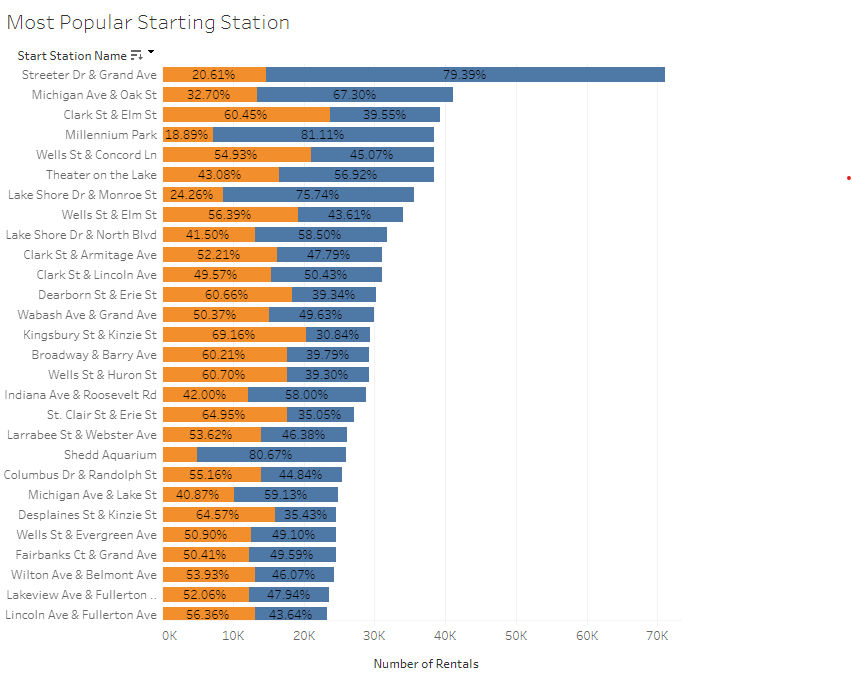
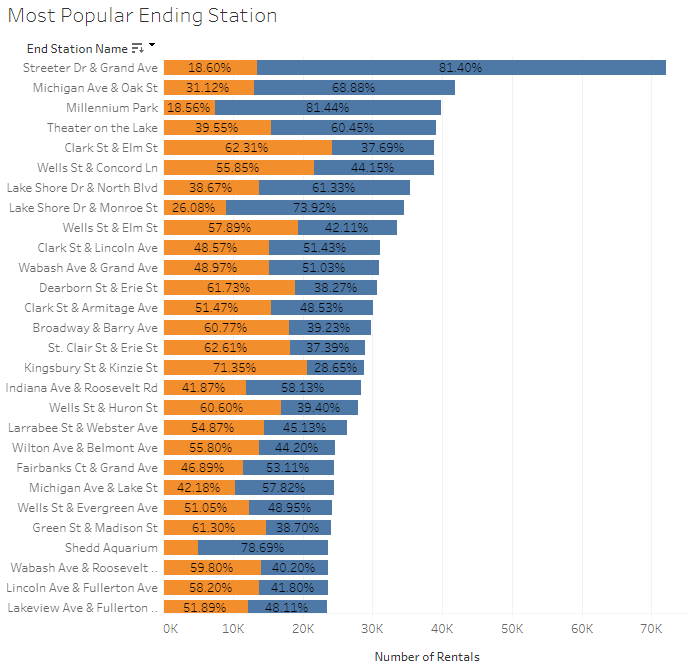

#### Average duration 
There is a drastic difference in the average ride time between the two. Casual riders would take double the riding time than the members on average in anyday of the week. Members, on the other hand, demonstrates their needs on getting from point A to point B. 

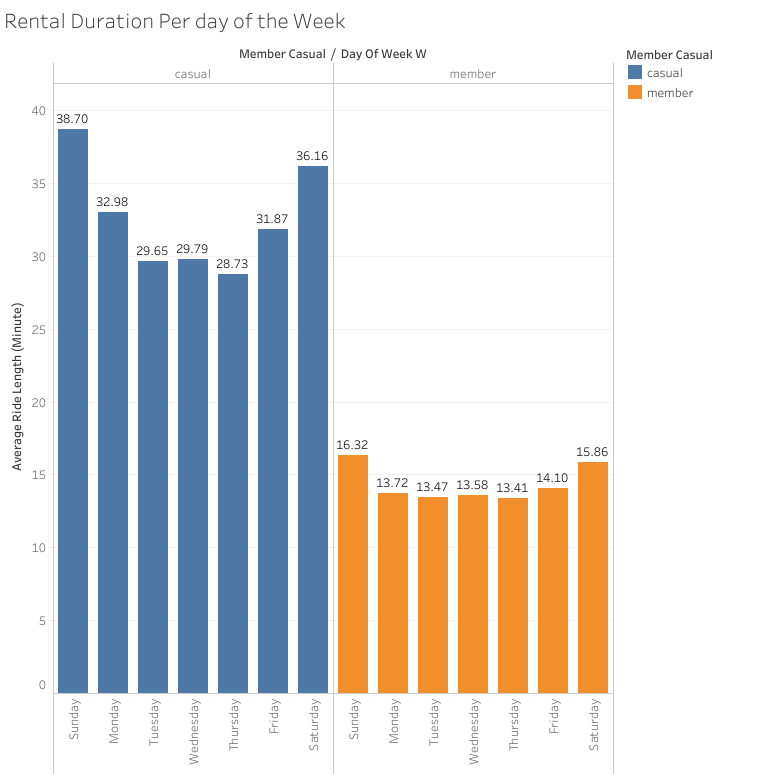

#### Types of bike 

We can observe that both members and casual riders favors the classic bike the most. However, we can see that members uses the classic bike much more than the other two types incomparison to the casual riders. 

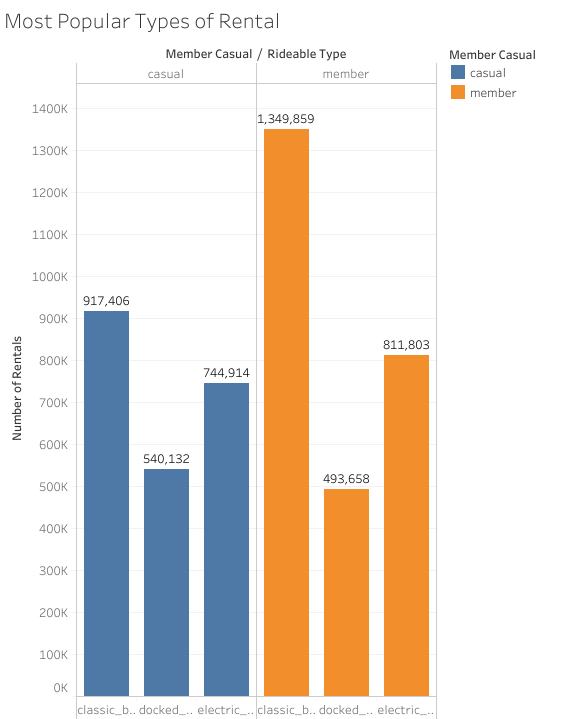

## Conclusion 

Our dataset showed important insights on how causal riders use our bikes differently from members. This would satisfy the assigned business task. However, to tie back to our final goal, which is to design marketing strategies aimed at converting casual riders into annual members, I have derived the following recommedations:

1) Provide sales event or coupons for casual riders to encourage them to convert into members. This could be a weekends event when casual rider’s traffic are the highest. As our data demonstrates, more than 50% of our current rental are by members. This shows the demand and potential of the service. Assuming the cost of a membership is higher than a casual rental, by reducing it, it will very likely influence rider’s decision. 

2) Focus the aforementioned marketing effort at the top five locations where casual riders visit the most. We could initiate a pilot program to collect feedbacks in those areas. More specifically, we can target those with longer ride length. Perhaps we can offer member rates for rental longer than 30 minutes. Then, we can increase the marketing effort in those locations, or expand to other stations to emphasize our sense of presence. 

3) Given our current data set is very limited, we should either get access to more data, or start collecting more data. For example, the current data set does not include rider’s ID, price of the different types of bikes, rental rates, rider’s demographics and rider’s opinion towards our current services. With those data available, we can further investigate on questions such as: how many casual riders returns, what price levels are the most acceptable, what do riders think about our bikes, why made members sign up in the first place, and much more. With demographics data, such as age, family size and address, we can find out who we should advertise digital media to, and what kind of promotion we can offer. 
